In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import os
import cv2
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,GlobalAveragePooling2D
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

In [48]:
# Define the paths to your image and csv folders
train_val_dir = "/content/drive/MyDrive/image_chart_train/"
test_dir = "/content/drive/MyDrive/image_chart_test/"
train_path_labels = "/content/drive/MyDrive/image_chart_labels_train/train_val.csv"
train_val_labels = pd.read_csv(train_path_labels)

In [49]:
# load training dataset in numpy array
images = []
labels = []
for filename in os.listdir(train_val_dir):
  if filename.endswith('.png'):
    # Load the images and resize them to (128, 128) with 3 color channels
    img = cv2.imread(os.path.join(train_val_dir, filename))
    img = cv2.resize(img, (128, 128))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # img = Image.open(os.path.join(train_val_dir, filename))
    img_array = np.array(img)
    # Append the array to the list of images
    images.append(img_array)
    labels.append(filename)
# Convert the string labels to numerical labels
le = LabelEncoder()
labels = le.fit_transform(labels)
# Convert the lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)
# Save the arrays in NumPy format
np.save('x_train.npy', images)
np.save('y_train.npy', labels)
x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')

In [50]:
x_train.shape

(1000, 128, 128, 3)

In [51]:
x_train[:5]
y_train[:5]

array([235, 301, 323, 223,  79])

In [52]:
# load test dataset in numpy array
images = []
labels = []
for filename in os.listdir(test_dir):
  if filename.endswith('.png'):
    # Load the images and resize them to (128, 128) with 3 color channels
    img = cv2.imread(os.path.join(test_dir, filename))
    img = cv2.resize(img, (128, 128))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # img = Image.open(os.path.join(test_dir, filename))
    img_array = np.array(img)
    # Append the array to the list of images
    images.append(img_array)
    labels.append(filename)
# Convert the string labels to numerical labels
le = LabelEncoder()
labels = le.fit_transform(labels)
# Convert the lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)
# Save the arrays in NumPy format
np.save('x_test.npy', images)
np.save('y_test.npy', labels)
x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

In [53]:
x_test.shape

(50, 128, 128, 3)

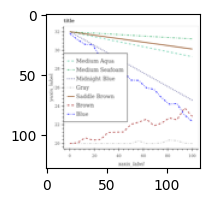

In [54]:
# check the images loaded
plt.figure(figsize = (10,2))
plt.imshow(x_train[10])
plt.imshow(x_train[208])
plt.imshow(x_train[444])

In [55]:
# define some classes from the images we have observed
image_classes = ['line', 'dot_line', 'hbar_categorical', 'vbar_categorical', 'pie']
image_classes[0]
# map the categories to the labels array i.e y_train
label_map = {'line': 0, 'dot_line': 1, 'hbar_categorical': 2, 'vbar_categorical': 3, 'pie': 4}
y_train = np.array([label_map[label] for label in train_val_labels['type']])
y_train
y_train.shape
y_test.shape

(50,)

In [56]:
# we need to map the lables from csv to the images somehow
# function to test the chart sample
def image_sample(x, y, index):
  plt.figure(figsize = (10,2))
  plt.imshow(x[index])
  # image_label = train_val_labels.iloc[index]['type']
  # plt.xlabel(image_label)
  plt.xlabel(image_classes[y[index]])

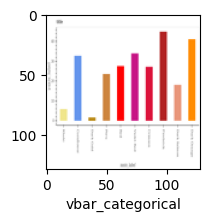

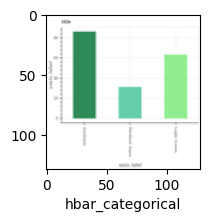

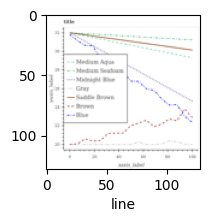

In [57]:
image_sample(x_train,y_train,0)
image_sample(x_train,y_train,208)
image_sample(x_train,y_train,444)

In [58]:
# now we have mapped the corresponding labels to the image

In [59]:
# normalize the image
# x_train[0]/255
x_train=x_train /255
x_test=x_train /255

In [60]:
x_test.shape

(1000, 128, 128, 3)

In [61]:
# take the label for train data from csv file
y_train_index = train_val_labels['image_index']
y_train_type = train_val_labels['type']

In [62]:
y_train_type[:5]

0    vbar_categorical
1    vbar_categorical
2    vbar_categorical
3    vbar_categorical
4    vbar_categorical
Name: type, dtype: object

In [63]:
# writing a simple nn to test first
# Define the model architecture
model = Sequential([
Flatten(input_shape=(128,128,3)),
Dense(3000, activation='relu'),
Dense(1000, activation='relu'),
Dense(5, activation='softmax')
])
# Compile the model
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
32/32 [==============================] - 34s 1s/step - loss: 9.9142 - accuracy: 0.1930
Epoch 2/10
32/32 [==============================] - 33s 1s/step - loss: 1.6396 - accuracy: 0.1950
Epoch 3/10
32/32 [==============================] - 37s 1s/step - loss: 1.6494 - accuracy: 0.1870
Epoch 4/10
32/32 [==============================] - 33s 1s/step - loss: 1.6130 - accuracy: 0.1950
Epoch 5/10
32/32 [==============================] - 33s 1s/step - loss: 1.6134 - accuracy: 0.2040
Epoch 6/10
32/32 [==============================] - 33s 1s/step - loss: 1.6099 - accuracy: 0.2070
Epoch 7/10
32/32 [==============================] - 34s 1s/step - loss: 1.6104 - accuracy: 0.1890
Epoch 8/10
32/32 [==============================] - 33s 1s/step - loss: 1.6102 - accuracy: 0.1960
Epoch 9/10
32/32 [==============================] - 33s 1s/step - loss: 1.6189 - accuracy: 0.1880
Epoch 10/10
32/32 [==============================] - 36s 1s/step - loss: 1.6098 - accuracy: 0.2000


In [64]:
# Split the training images and labels into training and validation sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [65]:
model.evaluate(x_test,y_test)

7/7 [==============================] - 2s 270ms/step - loss: 1.6091 - accuracy: 0.1850


[1.6090775728225708, 0.1850000023841858]

In [66]:
y_pred = model.predict(x_test)
y_pred
y_pred_classes = [np.argmax(ele) for ele in y_pred]
# print("classificaton report : \n",classification_report(y_test,y_pred_classes))

7/7 [==============================] - 2s 333ms/step


In [67]:
# here we see the accuracy is very low and we need to modify our nn to add more layers for better accuracy

In [68]:
# Print the shapes of the arrays to verify that they loaded correctly
print("Train Images Shape:", x_train.shape)
print("Train Labels Shape:", y_train.shape)
print("Test Images Shape:", x_test.shape)
print("Test Labels Shape:", y_test.shape)

Train Images Shape: (800, 128, 128, 3)
Train Labels Shape: (800,)
Test Images Shape: (200, 128, 128, 3)
Test Labels Shape: (200,)


Epoch 1/50
1/1 [==============================] - 19s 19s/step - loss: 1.6128 - accuracy: 0.1900 - val_loss: 1.6899 - val_accuracy: 0.2400
Epoch 2/50
1/1 [==============================] - 15s 15s/step - loss: 1.6797 - accuracy: 0.2175 - val_loss: 1.6213 - val_accuracy: 0.2100
Epoch 3/50
1/1 [==============================] - 15s 15s/step - loss: 1.5980 - accuracy: 0.2488 - val_loss: 1.6058 - val_accuracy: 0.2800
Epoch 4/50
1/1 [==============================] - 15s 15s/step - loss: 1.5948 - accuracy: 0.2600 - val_loss: 1.5665 - val_accuracy: 0.2800
Epoch 5/50
1/1 [==============================] - 15s 15s/step - loss: 1.5466 - accuracy: 0.3162 - val_loss: 1.5447 - val_accuracy: 0.2900
Epoch 6/50
1/1 [==============================] - 19s 19s/step - loss: 1.5103 - accuracy: 0.3537 - val_loss: 1.5217 - val_accuracy: 0.3400
Epoch 7/50
1/1 [==============================] - 18s 18s/step - loss: 1.4701 - accuracy: 0.3812 - val_loss: 1.4839 - val_accuracy: 0.3400
Epoch 8/50
1/1 [===========

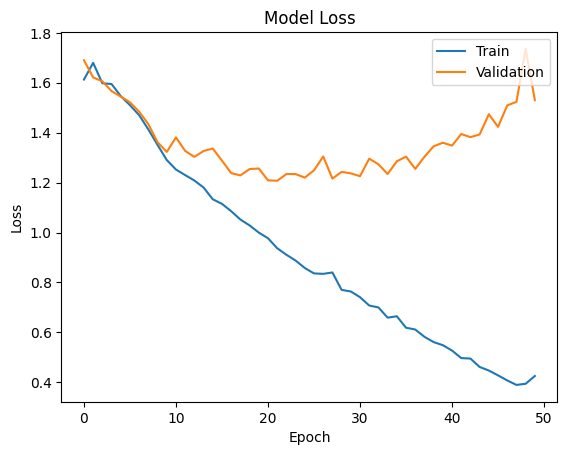

In [69]:
# modify the model architecture to cmnn
cnn_model = Sequential([
Conv2D(filters=16 ,kernel_size=(3,3), activation='relu', input_shape=(128,128,3)),
MaxPooling2D(pool_size=(2,2)),
Conv2D(32, (3,3), activation='relu'),
MaxPooling2D(pool_size=(2,2)),
Conv2D(64, (3,3), activation='relu'),
MaxPooling2D(pool_size=(2,2)),
Flatten(),
Dense(128, activation='relu'),
Dense(5, activation='softmax')
])
# Compile the model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train the model
history = cnn_model.fit(x_train, y_train, batch_size=1000, epochs=50,validation_data=(x_test, y_test))
# Plot the obtained loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [70]:
cnn_model.evaluate(x_test,y_test)

7/7 [==============================] - 1s 120ms/step - loss: 1.5303 - accuracy: 0.4550


[1.5302654504776, 0.45500001311302185]

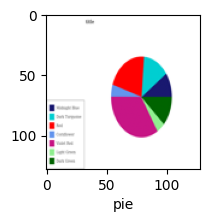

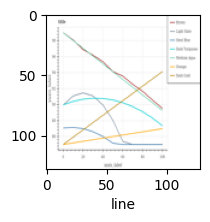

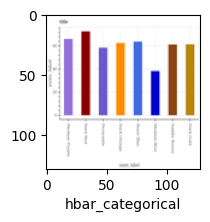

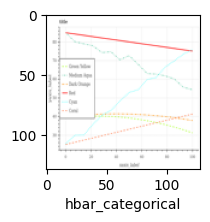

In [71]:
image_sample(x_test,y_test,1)
image_sample(x_test,y_test,50)
image_sample(x_test,y_test,25)
image_sample(x_test,y_test,30)

In [72]:
# Observation: we can see some wrong predictions

In [73]:
y_pred = cnn_model.predict(x_test)
y_pred[:5]

7/7 [==============================] - 1s 117ms/step


array([[3.8799903e-01, 1.1117729e-01, 2.7731296e-01, 5.7574464e-03,
        2.1775319e-01],
       [9.7705233e-01, 5.3654762e-04, 4.2546066e-07, 4.6454563e-08,
        2.2410618e-02],
       [1.3704634e-01, 8.5523090e-04, 4.0687906e-04, 5.2934373e-04,
        8.6116219e-01],
       [4.0900007e-01, 3.6145229e-02, 3.7790802e-01, 3.5215633e-03,
        1.7342508e-01],
       [1.6449330e-02, 2.5029142e-06, 3.6466697e-01, 6.1887997e-01,
        1.2719159e-06]], dtype=float32)

In [74]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[0, 0, 4, 0, 3]

In [75]:
y_test[:5]

array([0, 4, 4, 4, 0])

In [76]:
# here we see some values are not matching

'pie'

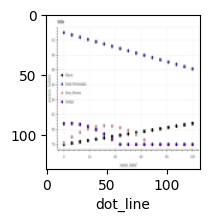

In [77]:
# test actual and predicted
# image_sample(x_test,y_test,1) #actual
# image_classes[y_classes[1]] #predicted
# image_sample(x_test,y_test,10) #actual
# image_classes[y_classes[10]] #predicted
image_sample(x_test,y_test,15) #actual
image_classes[y_classes[15]] #predicted

In [78]:
# some values are not matching

In [79]:
print("classification report: \n", classification_report(y_test,y_classes))

classification report: 
               precision    recall  f1-score   support

           0       0.36      0.49      0.41        37
           1       0.85      0.64      0.73        44
           2       0.39      0.44      0.41        48
           3       0.38      0.27      0.32        33
           4       0.38      0.39      0.39        38

    accuracy                           0.46       200
   macro avg       0.47      0.45      0.45       200
weighted avg       0.48      0.46      0.46       200



In [80]:
# Generate the confusion matrix
conf_mat = confusion_matrix(y_test, y_classes)
print('Confusion Matrix:')
print(conf_mat)

Confusion Matrix:
[[18  0  7  3  9]
 [ 2 28  1  0 13]
 [14  0 21 12  1]
 [ 2  0 21  9  1]
 [14  5  4  0 15]]


Text(95.72222222222221, 0.5, 'Actual')

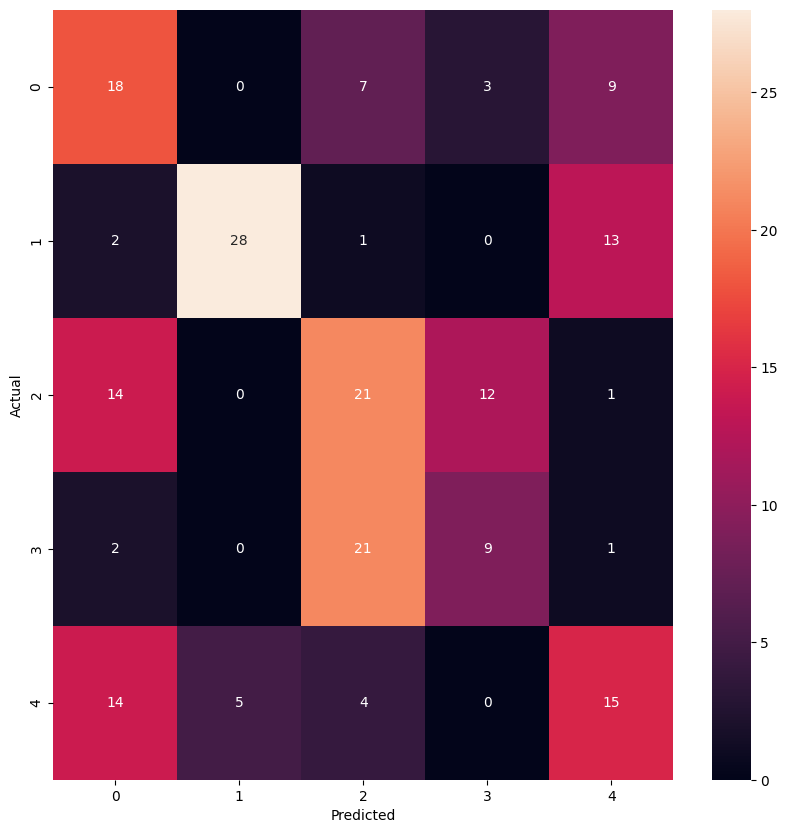

In [81]:
# Plot the confusion matrix
import seaborn as sn
plt.figure(figsize = (10,10))
sn.heatmap(conf_mat,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [82]:
# for 50 iterations, we can see some promising accuracy, more training will be required for better accuracy
# in the confusion matrix, whatever is not in diagonal is a error

In [83]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Load the pre-trained model
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [84]:
# Replace the final classification layer with a new layer
x = vgg16_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(5, activation='softmax')(x)
pt_model = tf.keras.Model(inputs=vgg16_model.input, outputs=predictions)

In [85]:
# Freeze the weights of all layers except the new classification layer
for layer in pt_model.layers:
  layer.trainable = False

In [86]:
# Compile the model with categorical crossentropy loss and Adam optimizer
pt_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [87]:
# Print the summary of the model architecture
pt_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [88]:
# Set up data generators for image augmentation and feeding data to the model
train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=20,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

In [89]:
# flow method generates batches of augmented data
train_generator = train_datagen.flow(x_train, y_train, batch_size=32)
test_generator = train_datagen.flow(x_test, y_test, batch_size=32)